In [34]:
from opensimplex import OpenSimplex
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, LineString
from shapely.ops import polygonize, unary_union
import random
from descartes import PolygonPatch

from cycsat.terrain import mpd

%matplotlib inline

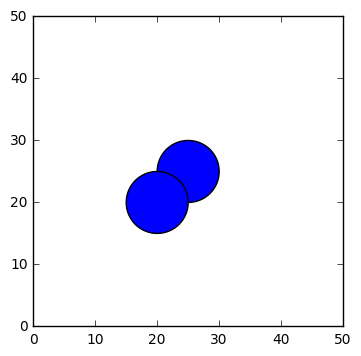

In [9]:
b = Point(25,25).buffer(5); a = Point(20,20).buffer(5)

ax = plt.subplot(1,1,1)
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.set_aspect('equal')
ax.add_patch(PolygonPatch(b))
ax.add_patch(PolygonPatch(a))

AttributeError: 'Polygon' object has no attribute 'almost'

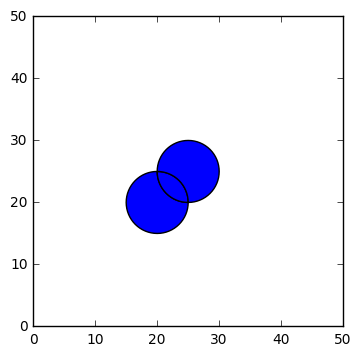

In [45]:
b = Point(25,25).buffer(5); a = Point(20,20).buffer(5)

rings = [LineString(pol.exterior.coords) for pol in [a,b]]
union = unary_union(rings)
result = [geom for geom in polygonize(union)]

ax = plt.subplot(1,1,1)
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.set_aspect('equal')

for r in result:
    ax.add_patch(PolygonPatch(r))

finals = list()
    
for res in result:
    checks = list()
    for s in [a,b]:
        if s.almost(res):
            print(True)
            checks.append(True)
        else:
            print(False)
            checks.append(False)
    if False not in checks:
        finals.append(res)

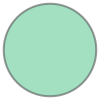

In [43]:
a

In [35]:
tmp = OpenSimplex(seed=5)

terrain = np.zeros((250,250))

In [37]:
for x in range(0,terrain.shape[0]):
    for y in range(0,terrain.shape[1]):
        terrain[x,y] = tmp.noise2d(x,y)

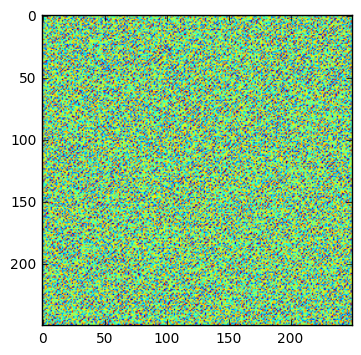

In [38]:
plt.imshow(terrain)

In [14]:
terrain2 = mpd(8,7)

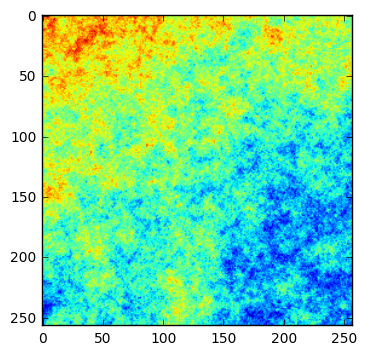

In [15]:
plt.imshow(terrain2)

In [3]:
import os                             # path resolving and image saving
import random                         # midpoint displacement
from PIL import Image, ImageDraw      # image creation and drawing
import bisect                         # working with the sorted list of points

In [7]:
# Iterative midpoint vertical displacement
def midpoint_displacement(start, end, roughness, vertical_displacement=None,
                          num_of_iterations=16):
    """
    Given a straight line segment specified by a starting point and an endpoint
    in the form of [starting_point_x, starting_point_y] and [endpoint_x, endpoint_y],
    a roughness value > 0, an initial vertical displacement and a number of
    iterations > 0 applies the  midpoint algorithm to the specified segment and
    returns the obtained list of points in the form
    points = [[x_0, y_0],[x_1, y_1],...,[x_n, y_n]]
    """
    # Final number of points = (2^iterations)+1
    if vertical_displacement is None:
        # if no initial displacement is specified set displacement to:
        #  (y_start+y_end)/2
        vertical_displacement = (start[1]+end[1])/2
    
    # Data structure that stores the points is a list of lists where
    # each sublist represents a point and holds its x and y coordinates:
    # points=[[x_0, y_0],[x_1, y_1],...,[x_n, y_n]]
    #              |          |              |
    #           point 0    point 1        point n
    # The points list is always kept sorted from smallest to biggest x-value
    points = [start, end]
    iteration = 1
    while iteration <= num_of_iterations:
        # Since the list of points will be dynamically updated with the new computed
        # points after each midpoint displacement it is necessary to create a copy
        # of the state at the beginning of the iteration so we can iterate over
        # the original sequence.
        # Tuple type is used for security reasons since they are immutable in Python.
        points_tup = tuple(points)
        for i in range(len(points_tup)-1):
            # Calculate x and y midpoint coordinates:
            # [(x_i+x_(i+1))/2, (y_i+y_(i+1))/2]
            midpoint = list(map(lambda x: (points_tup[i][x]+points_tup[i+1][x])/2,
                                [0, 1]))
            # Displace midpoint y-coordinate
            midpoint[1] += random.choice([-vertical_displacement,
                                          vertical_displacement])
            # Insert the displaced midpoint in the current list of points         
            bisect.insort(points, midpoint)
            # bisect allows to insert an element in a list so that its order
            # is preserved.
            # By default the maintained order is from smallest to biggest list first
            # element which is what we want.
        # Reduce displacement range
        vertical_displacement *= 2 ** (-roughness)
        # update number of iterations
        iteration += 1
    return points

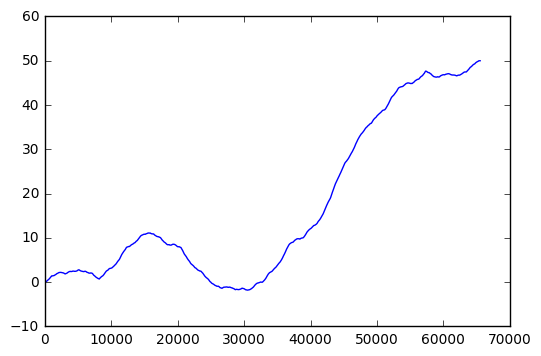

In [10]:
a = midpoint_displacement([0,0],[50,50],1.2,num_of_iterations=16)
plt.plot(np.array(a)[:,1])